In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:

credit_card_data = pd.read_csv(r'C:\Users\ishus\OneDrive\Desktop\training\creditcard.csv')

credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The Non-Null Count in the output of credit_card_data.info() indicates the number of non-missing values (non-null values) for each column in your DataFrame. This is useful for understanding if there are any missing values in your dataset and how complete your data is.

In [5]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The value_counts() method in pandas is used to count the occurrences of each unique value in a Series. It returns a Series containing counts of unique values.

In the context of the credit card fraud detection dataset, you can use value_counts() to see how many transactions are legitimate (Class 0) and how many are fraudulent (Class 1).

In [6]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This Dataset is highly unblanced********

0 --> Normal Transaction********

1 --> fraudulent transaction****

In [7]:
# separating the data for analysis
not_fraud = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

The print(not_fraud.shape) statement in Python, when used in the context of a pandas DataFrame, prints the shape of the DataFrame not_fraud. 
The shape is a tuple that contains two values: the number of rows and the number of columns in the DataFrame.

In [8]:
print(not_fraud.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
# statistical measures of the data
not_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Mean:	Comparing average transaction amounts across classes.
Median:  Understanding typical transaction amounts in the presence of extreme values.

In [11]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007846,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions**

In [12]:
not_fraud_sample = not_fraud.sample(n=492) #takes a random sample of 492 rows from the not_fraud DataFrame.
new_dataset = pd.concat([not_fraud_sample, fraud], axis=0)


#In the statement new_dataset = pd.concat([not_fraud_sample, fraud], axis=0), 
-axis=0 parameter specifies that you want to concatenate the DataFrames along the rows.

-axis=1 is used for column-wise concatenation,
which is suitable for adding new features or combining data with different structures.

In [13]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
150564,93674.0,-1.475044,2.232646,-1.984308,-0.999394,0.234771,-1.444424,0.359397,0.936604,0.670691,...,0.181019,0.638579,-0.094658,-0.380548,-0.178724,0.069800,0.192622,0.180993,1.46,0
219435,141733.0,1.870024,-0.113368,-1.845561,0.385886,0.398409,-0.675439,0.257685,-0.261171,0.801487,...,-0.187856,-0.428576,0.122552,0.528587,-0.027173,-0.125386,-0.015390,0.001593,93.82,0
71365,54271.0,-0.382595,1.033601,1.354301,-0.147898,0.170425,-0.604505,0.714193,-0.041918,-0.379042,...,-0.257614,-0.677740,-0.077223,-0.131356,-0.122579,0.101664,0.264233,0.116397,6.15,0
13582,24079.0,-3.635524,-2.645608,2.277165,1.586797,3.886486,-2.426971,-2.407131,0.124525,1.007785,...,-0.081393,0.321419,-1.037570,0.071328,0.410964,-0.195958,0.473601,-0.158771,5.95,0
5124,4814.0,-2.090093,1.026288,1.857808,1.443713,1.118916,0.243117,0.353636,0.365639,-0.125997,...,-0.402917,-0.710011,0.225826,-0.414035,0.335121,-0.366760,-0.173759,-0.274109,0.90,0


In [14]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [15]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [16]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96011.739837,-0.077629,-0.151898,-0.028702,0.044472,0.050403,-0.080853,0.104518,0.015300,-0.035538,...,0.020741,0.035991,0.009519,0.020973,-0.075347,0.016959,0.007677,0.020878,-0.013030,111.625467
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
#Splitting the data into Features & Targets
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

When applied to a DataFrame, drop can be used to drop specific labels (such as column names or row indices) or entire rows/columns based on various criteria.

In [18]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
150564   93674.0 -1.475044  2.232646 -1.984308 -0.999394  0.234771 -1.444424   
219435  141733.0  1.870024 -0.113368 -1.845561  0.385886  0.398409 -0.675439   
71365    54271.0 -0.382595  1.033601  1.354301 -0.147898  0.170425 -0.604505   
13582    24079.0 -3.635524 -2.645608  2.277165  1.586797  3.886486 -2.426971   
5124      4814.0 -2.090093  1.026288  1.857808  1.443713  1.118916  0.243117   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [19]:
print(Y)

150564    0
219435    0
71365     0
13582     0
5124      0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X and Y are your features and labels respectively
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, Y_train)

# Predict on the training data
X_train_prediction = model.predict(X_train)

# Calculate the accuracy on the training data
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print(f"Accuracy on training data: {training_data_accuracy}")


Accuracy on training data: 0.9364675984752223


C:\Users\ishus\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9364675984752223


In [25]:
# accuracy on test data
model = LogisticRegression()
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Visualization part

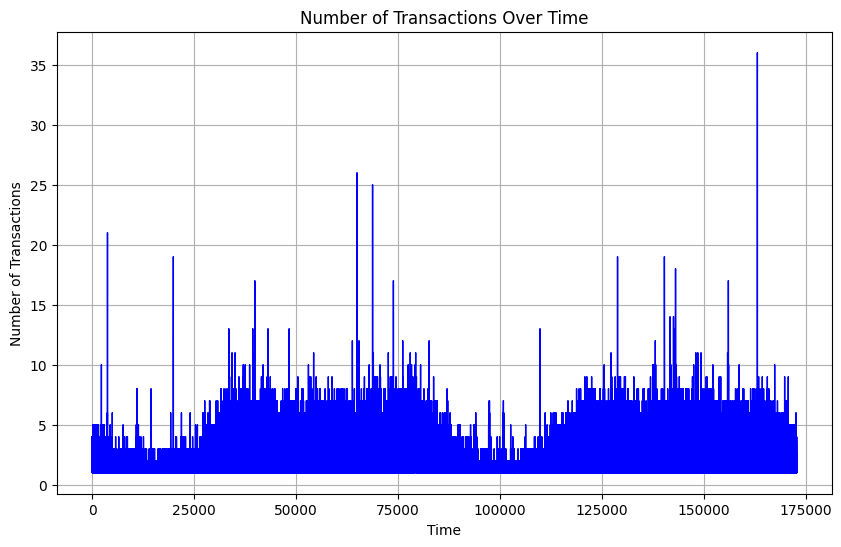

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
#line plot
# Read the dataset from the CSV file
data = pd.read_csv(r'C:\Users\ishus\OneDrive\Desktop\training\creditcard.csv')

# Group by 'Time' and count the number of transactions
time_counts = data.groupby('Time').size()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(time_counts.index, time_counts.values, color='blue', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.grid(True)
plt.show()


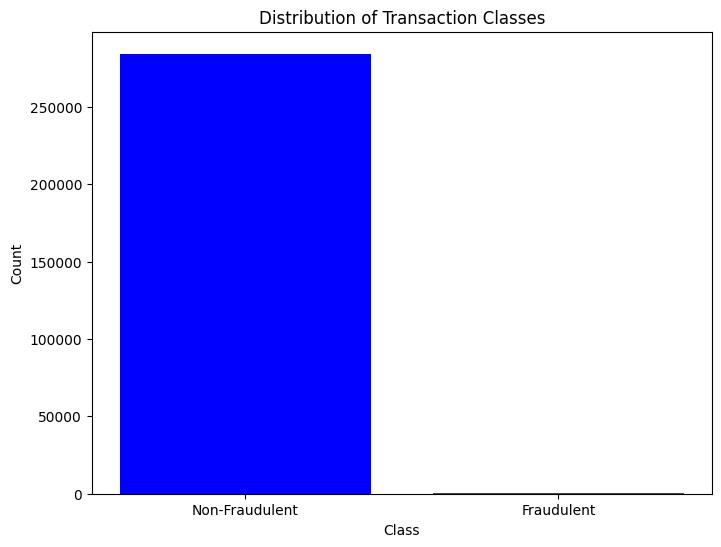

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset from the CSV file
data = pd.read_csv(r'C:\Users\ishus\OneDrive\Desktop\training\creditcard.csv')

# Calculate the distribution of the 'Class' column
class_counts = data['Class'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Transaction Classes')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()


Here's a step-by-step breakdown of the code:

Import libraries: We import the necessary libraries: matplotlib.pyplot and pandas.
Read data: We read the data from a CSV file named creditcard.csv into a pandas DataFrame.
Calculate class counts: We use the value_counts method to get the count of each class.
Create bar plot: We create a bar plot using Matplotlib's bar function.
Label the plot: We add labels and a title to the plot for clarity.
Ensure the CSV file creditcard.csv is in the same directory as your script or provide the correct path to the file.

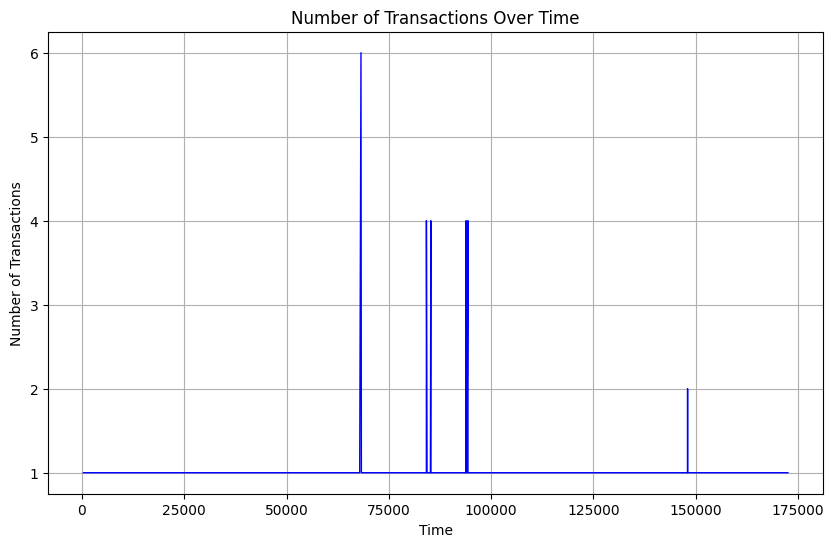

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
#line plot
# Read the dataset from the new CSV file
not_fraud_sample = not_fraud.sample(n=492) #takes a random sample of 492 rows from the not_fraud DataFrame.
new_dataset = pd.concat([not_fraud_sample, fraud], axis=0)
data=new_dataset
# Group by 'Time' and count the number of transactions
time_counts = data.groupby('Time').size()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(time_counts.index, time_counts.values, color='blue', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.grid(True)
plt.show()


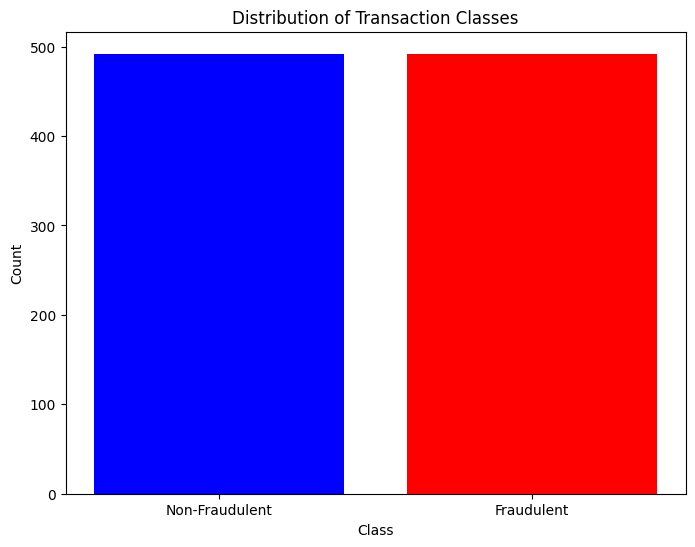

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset from the newCSV file
not_fraud_sample = not_fraud.sample(n=492) #takes a random sample of 492 rows from the not_fraud DataFrame.
new_dataset = pd.concat([not_fraud_sample, fraud], axis=0)
data=new_dataset


# Calculate the distribution of the 'Class' column
class_counts = data['Class'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Transaction Classes')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

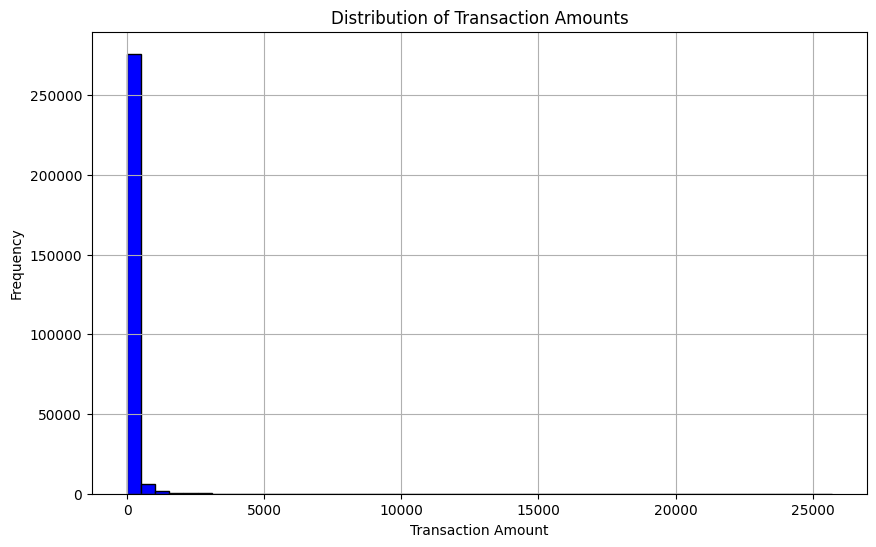

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset from the CSV file
data = pd.read_csv(r'C:\Users\ishus\OneDrive\Desktop\training\creditcard.csv')


# Create the histogram for the 'Amount' column
plt.figure(figsize=(10, 6))
plt.hist(data['Amount'], bins=50, color='blue', edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.grid(True)
plt.show()


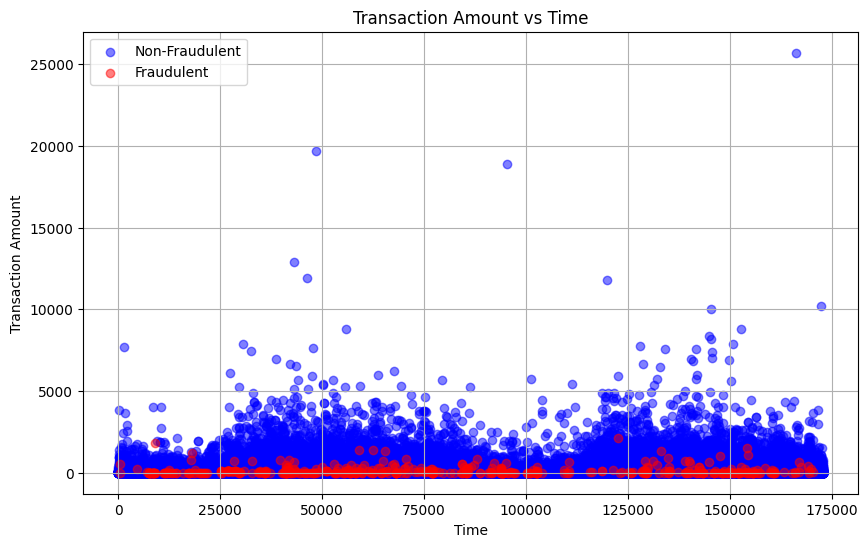

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset from the CSV file
data = pd.read_csv(r'C:\Users\ishus\OneDrive\Desktop\training\creditcard.csv')

# Separate the data into fraudulent and non-fraudulent transactions
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(non_fraud['Time'], non_fraud['Amount'], color='blue',alpha=0.5, label='Non-Fraudulent')
plt.scatter(fraud['Time'], fraud['Amount'], color='red',alpha=0.5, label='Fraudulent')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount vs Time')
plt.legend()
plt.grid(True)
plt.show()


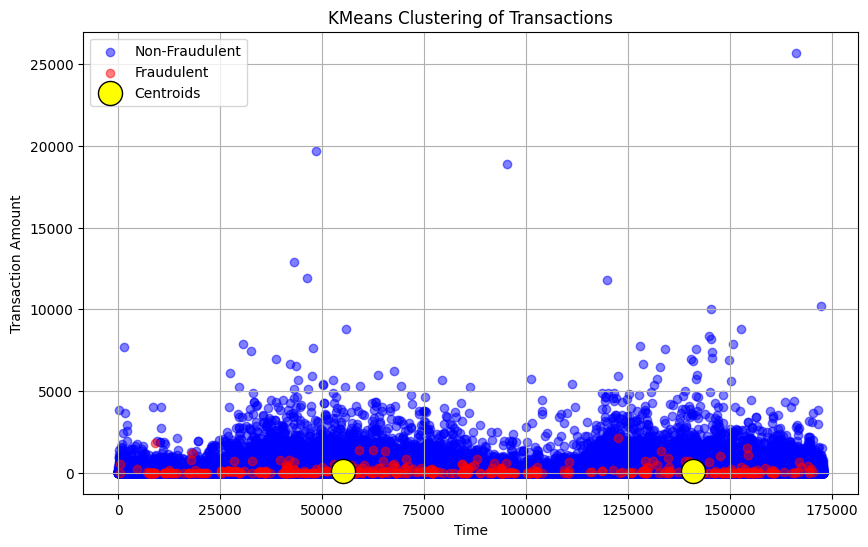

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Read the dataset from the CSV file
data = pd.read_csv(r'C:\Users\ishus\OneDrive\Desktop\training\creditcard.csv')
# Select the features for clustering (Amount and Time)
X = data[['Amount', 'Time']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
data['Cluster'] = kmeans.labels_
#KMeans(n_clusters=2, random_state=0): Creates a KMeans object with the following parameters:
#n_clusters=2: Specifies that the data should be divided into 2 clusters.
#random_state=0: Ensures reproducibility by setting a fixed seed for the random number generator.
#fit(X): Fits the KMeans model to the data X, where X contains the features 'Amount' and 'Time'.

# Separate the data into fraudulent and non-fraudulent transactions
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

# Create the scatter plot for non-fraudulent transactions
plt.figure(figsize=(10, 6))
plt.scatter(non_fraud['Time'], non_fraud['Amount'], color='blue', alpha=0.5, label='Non-Fraudulent')
plt.scatter(fraud['Time'], fraud['Amount'], color='red', alpha=0.5, label='Fraudulent')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='yellow', label='Centroids', edgecolor='black')
#Slicing Syntax
#[:, 1]: Selects all rows and the second column (index 1).
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.title('KMeans Clustering of Transactions')
plt.legend()
plt.grid(True)
plt.show()



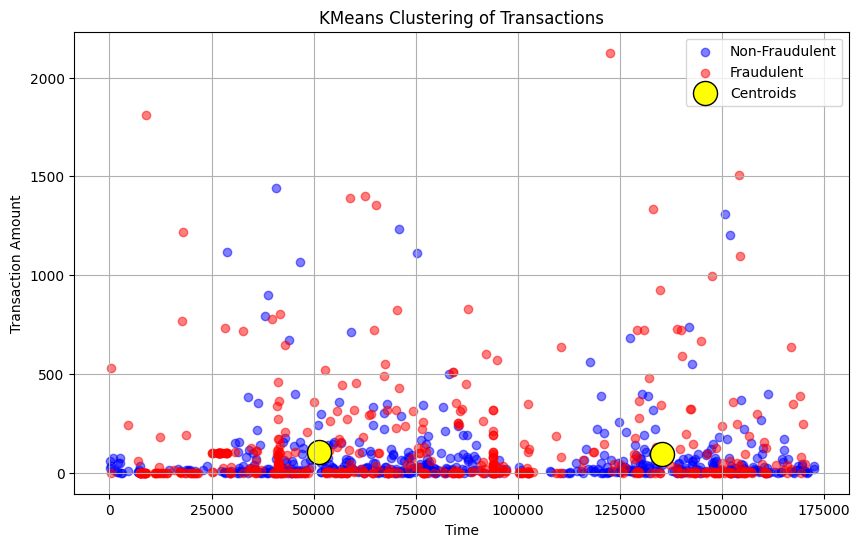

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Read the dataset from the newCSV file
not_fraud_sample = not_fraud.sample(n=492) #takes a random sample of 492 rows from the not_fraud DataFrame.
new_dataset = pd.concat([not_fraud_sample, fraud], axis=0)
data=new_dataset

# Select the features for clustering (Amount and Time)
X = data[['Amount', 'Time']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
data['Cluster'] = kmeans.labels_

# Separate the data into fraudulent and non-fraudulent transactions
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

# Create the scatter plot for non-fraudulent transactions
plt.figure(figsize=(10, 6))
plt.scatter(non_fraud['Time'], non_fraud['Amount'], color='blue', alpha=0.5, label='Non-Fraudulent')
plt.scatter(fraud['Time'], fraud['Amount'], color='red', alpha=0.5, label='Fraudulent')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='yellow', label='Centroids', edgecolor='black')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.title('KMeans Clustering of Transactions')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:

# Read the dataset from the CSV file
data = pd.read_csv(r'C:\Users\ishus\OneDrive\Desktop\training\creditcard.csv')

In [ ]:
# Standardize the data
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

[[-0.42313898  0.27974105 -0.49828391 ...  0.06112735 -0.3768336
   1.86185506]
 [ 0.82666689  0.20633657 -0.14846946 ... -0.59300919  0.01600929
  -0.40263364]
 [ 1.03231384  0.75906352 -0.85405162 ... -0.06281613 -0.11170541
   0.26079591]
 ...
 [ 1.17317022  0.04845361  0.52732002 ...  0.40032591 -0.20029367
  -0.45760908]
 [-0.97465818 -2.3632405   1.73938351 ... -1.4175467  -1.77094277
  -0.31744076]
 [ 0.73779022  0.73343675 -1.11045192 ... -0.16544732 -0.1392807
   0.97348751]]
[[ 1.38994516  0.63270558 -0.09904421 ...  0.42208454  0.47551885
  -0.24443642]
 [ 1.45416776  0.142711    0.11315424 ... -0.45809493 -0.60469759
  -0.41114023]
 [-1.52790233  0.56950427 -0.6230086  ... -0.05429969  0.01173584
   0.14022237]
 ...
 [-0.43199509  0.0822331  -0.37463325 ...  0.24507946  0.49670132
   1.61067782]
 [-0.67466523 -0.94135456  0.17474035 ...  1.12072691  0.79305131
  -0.45832854]
 [ 1.34764197  0.34692821 -0.5789634  ...  0.24672233  0.52261051
   0.13404345]]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
model = LogisticRegression()
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()